In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("TaxiFare.csv")

In [3]:
df.shape

(50000, 8)

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
df.describe(include='all')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


<Axes: xlabel='no_of_passenger', ylabel='count'>

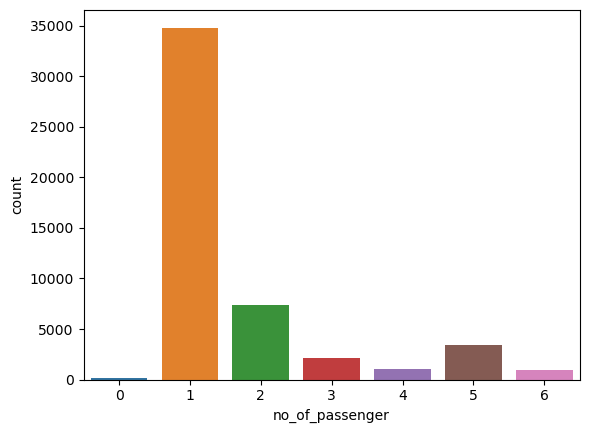

In [9]:
sns.countplot(x='no_of_passenger',data=df)

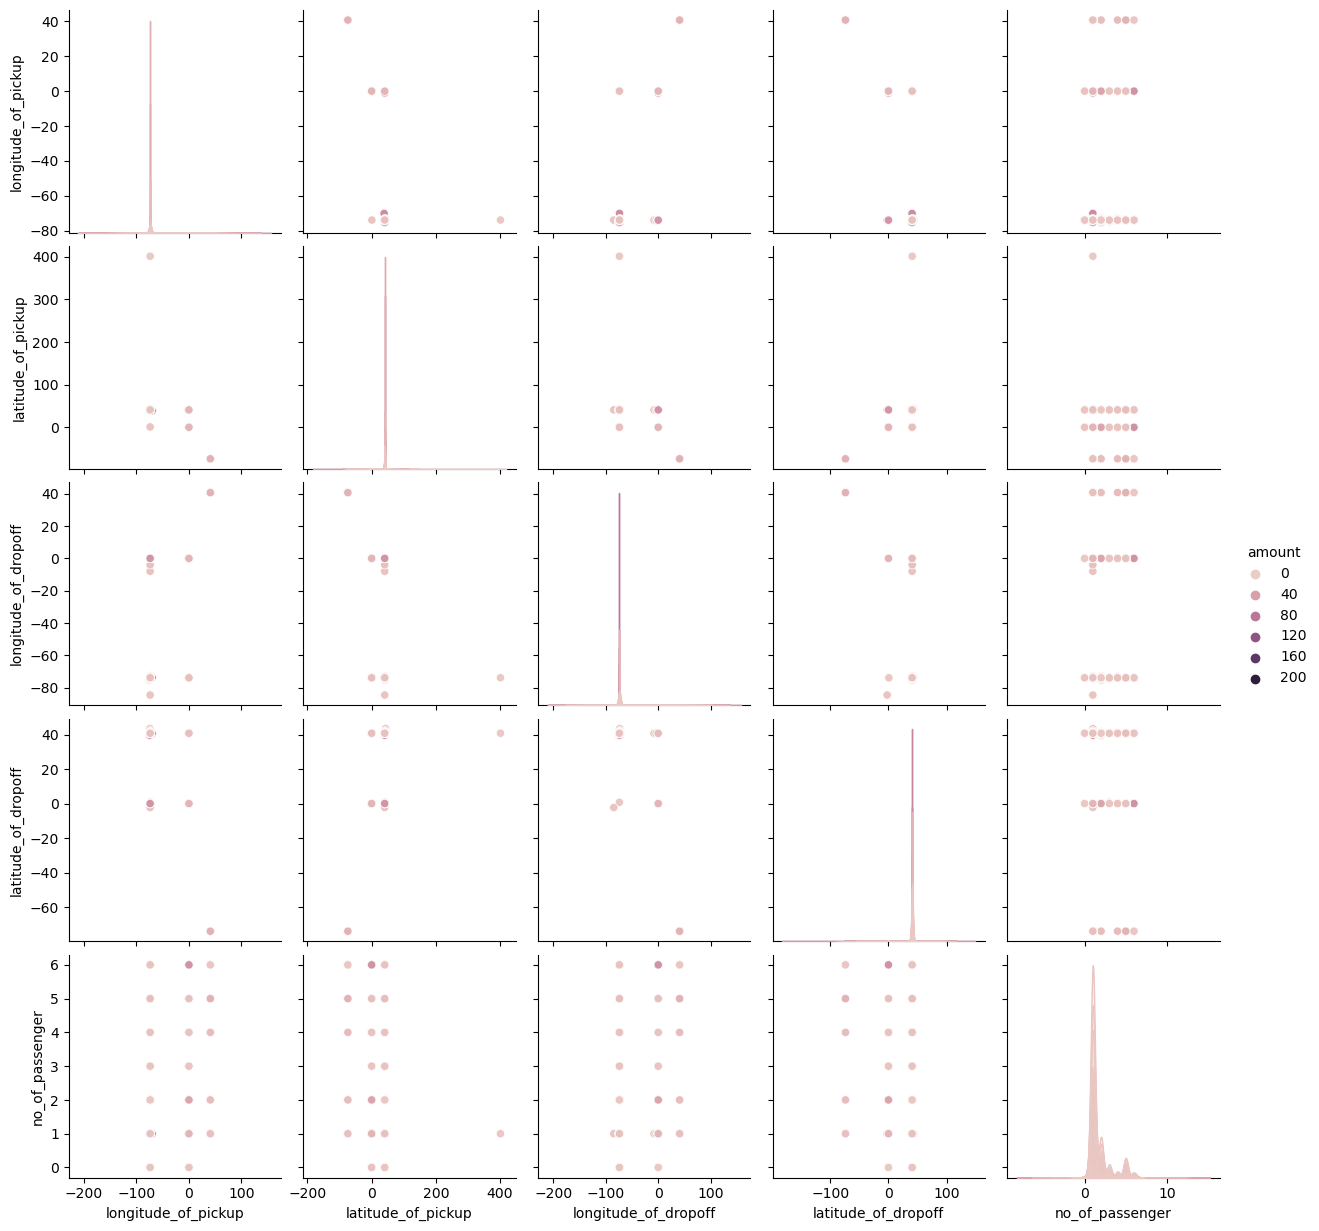

In [10]:
sns.pairplot(df,hue='amount')

In [14]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_mat = df[numeric_columns].corr()

<Axes: >

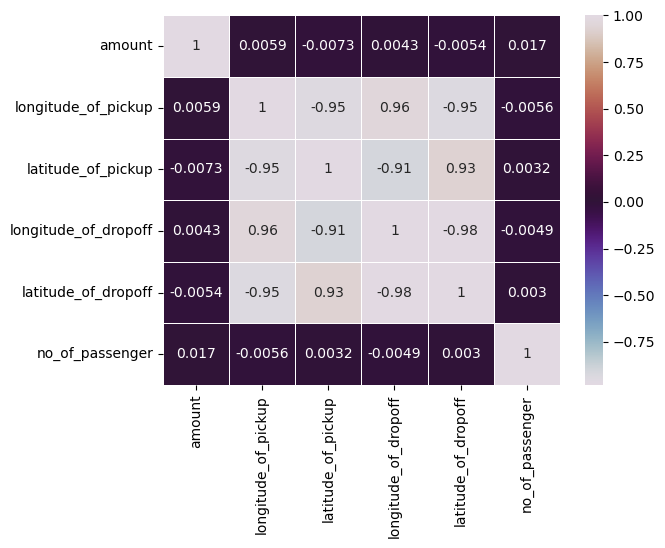

In [16]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="twilight")

<Axes: >

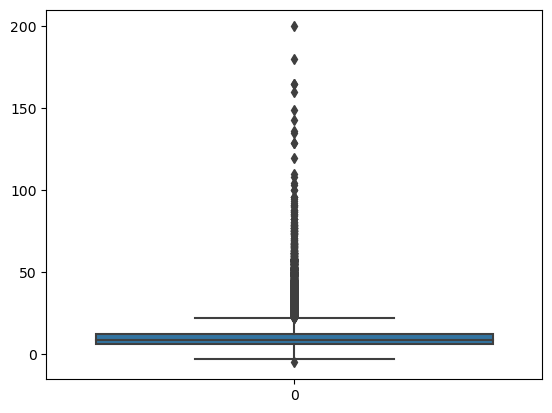

In [17]:
sns.boxplot(df['amount'])

In [18]:
df = df[df['no_of_passenger'] == 1]
df = df.drop(['unique_id', 'no_of_passenger'], axis=1)
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233


In [19]:
df.shape

(34808, 6)

In [20]:
import datetime
from math import sqrt

for i, row in df.iterrows():
    dt = datetime.datetime.strptime(row['date_time_of_pickup'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['longitude_of_dropoff'] - row['longitude_of_pickup']) * 54.6 # 1 degree == 54.6 miles
    y = (row['latitude_of_dropoff'] - row['latitude_of_pickup']) * 69.0   # 1 degree == 69 miles
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance
    
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,day_of_week,pickup_time,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,0.0,17.0,0.641024
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.0,5.275538
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,5.0,4.0,1.738444
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,7.0,1.253707
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,3.0,9.0,2.391384


In [21]:
df.drop(columns=['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'], inplace=True)
df.head()

,amount,day_of_week,pickup_time,distance
0,4.5,0.0,17.0,0.641024
1,16.9,1.0,16.0,5.275538
3,7.7,5.0,4.0,1.738444
4,5.3,1.0,7.0,1.253707
5,12.1,3.0,9.0,2.391384


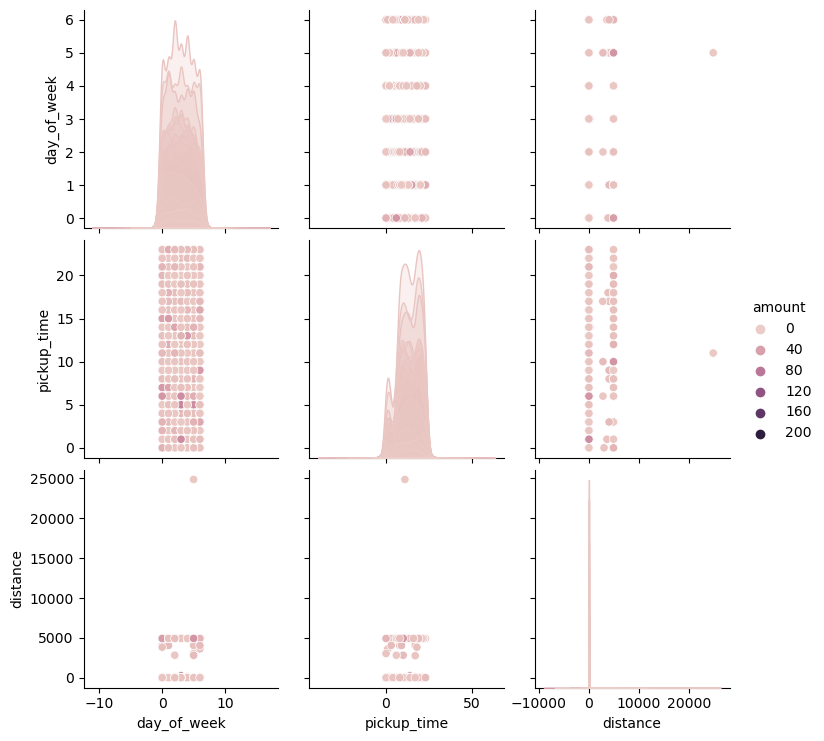

In [22]:
sns.pairplot(df,hue='amount')

In [23]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.014725
day_of_week    0.010151
pickup_time   -0.015876
Name: amount, dtype: float64

In [24]:
df.describe()

,amount,day_of_week,pickup_time,distance
count,34808.000000,34808.000000,34808.000000,34808.000000
mean,11.210226,2.947713,13.382757,11.850895
std,9.527580,1.942392,6.401627,246.753948
min,-5.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.771727
50%,8.500000,3.000000,14.000000,1.322725
75%,12.500000,5.000000,19.000000,2.414889
max,200.000000,6.000000,23.000000,24861.003946


In [25]:
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['amount'] > 0.0) & (df['amount'] < 50.0)]
df.shape

(21318, 4)

In [26]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.848715
day_of_week    0.002447
pickup_time   -0.018968
Name: amount, dtype: float64

# Train a regression model

In [27]:
from sklearn.model_selection import train_test_split

x = df.drop(['amount'], axis=1)
y = df['amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression

l_model = LinearRegression()
l_model.fit(x_train, y_train)

LinearRegression()

In [30]:
l_model.score(x_train, y_train)

0.7189726461612352

In [31]:
l_model.score(x_test, y_test)

0.7294968092631228

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(l_model, x, y, cv=5).mean()

0.7207057353445661

In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, l_model.predict(x_test))

2.428339345293518

In [37]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(random_state=0)
RF_model.fit(x_train, y_train)
cross_val_score(RF_model, x, y, cv=5).mean()

0.6997168858484374

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(RF_model, x, y, cv=5).mean()

0.6997168858484374

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, RF_model.predict(x_test))

2.5505358818011254

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_model = GradientBoostingRegressor(random_state=0)
GBR_model.fit(x_train, y_train)
cross_val_score(GBR_model, x, y, cv=5).mean()

0.7424626872254264

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(GBR_model, x, y, cv=5).mean()

0.7424626872254264

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, GBR_model.predict(x_test))

2.2980750381072497

In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
ABR_model = AdaBoostRegressor(random_state=0)
ABR_model.fit(x_train, y_train)
cross_val_score(ABR_model, x, y, cv=5).mean()

0.6377587278626594

In [44]:
from sklearn.ensemble import BaggingRegressor
BR_model = BaggingRegressor(random_state=0)
BR_model.fit(x_train, y_train)
cross_val_score(BR_model, x, y, cv=5).mean()

0.6792629704131501

In [45]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

base_estimator = DecisionTreeRegressor(max_depth=1000)
bagging_regressor = BaggingRegressor(base_estimator=base_estimator, n_estimators=50, random_state=0)
bagging_regressor.fit(x_train, y_train)
cross_val_score(bagging_regressor, x, y, cv=5).mean()

0.6982636272264525

In [47]:
BR_model.predict([[4, 17, 2.0]])#BaggingRegressor

array([19.5])

In [48]:
l_model.predict([[4, 17, 2.0]])#LinearRegression

array([10.75332572])

In [49]:
RF_model.predict([[4, 17, 2.0]])#RandomForestRegressor

array([16.612])

In [50]:
GBR_model.predict([[4, 17, 2.0]])#GradientBoostingRegressor

array([11.67386518])

In [51]:
ABR_model.predict([[4, 17, 2.0]])#AdaBoostRegressor

array([12.63784112])